In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sympy as sp
#from pysr import PySRRegressor, TemplateExpressionSpec
from scipy import special
import matplotlib.pyplot as plt
import os

from symreg import Problem
from symreg import Solution
from symreg import Promising_solution
from symreg import create_arbitrary_constraint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
X = np.linspace(95,300, 500).reshape(-1,1)
y = special.jv(100, X).reshape(-1, 1)

Loading and combining 19 solutions from '/home/danielct/Desktop/Internship_Oxford_2025/BesselML/examples/pysr_runs/20250901_162108_JuliaRun/20250901_162111_PeImmx/hall_of_fame.csv'...
Problem 'CSV_Loaded_Problem_Fixed_template_B100' populated. Loaded and combined 19 solutions.


<Axes: title={'center': 'CSV_Loaded_Problem_Fixed_template_B100 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

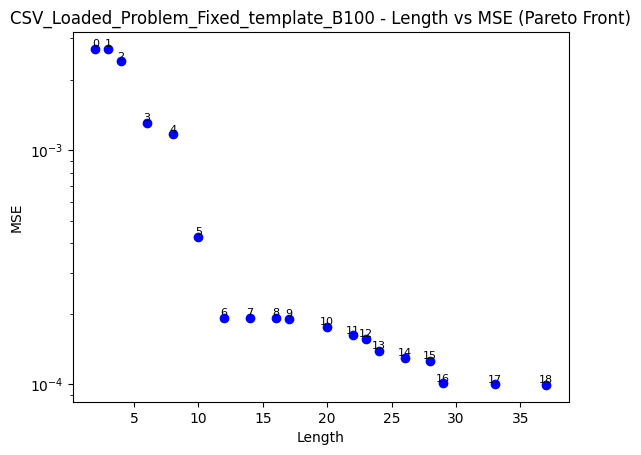

In [ ]:
my_problem_csv = Problem(
    name="CSV_Loaded_Problem_Fixed_template_B100",
    train_data=(X.flatten(), y.flatten()),
    test_data=(X.flatten(), y.flatten()),
    args={}
)

#? Good solution - "/home/danielct/Desktop/Bessel_oxinternship_package/bessel_symreg/examples/pysr_runs/20250901_162108_JuliaRun/20250901_162111_PeImmx/hall_of_fame.csv"

my_problem_csv.pysr_populate_solutions_from_csv("/home/danielct/Desktop/Bessel_oxinternship_package/bessel_symreg/examples/pysr_runs/20250901_162108_JuliaRun/20250901_162111_PeImmx/hall_of_fame.csv")
my_problem_csv.plot_l_vs_mse()

In [34]:
k = -1
my_problem_csv.solutions[k].display_expression(), my_problem_csv.solutions[k].b_vals

<IPython.core.display.Math object>

(None,
 {'b0': 12.214335716907954,
  'b1': 1.1711012877196936,
  'b2': 3922.5725026177242,
  'b3': 1.2841147731714955,
  'b4': 3923.7372411917895,
  'b5': 0.7646877584434151,
  'b6': 27.791473464461887,
  'b7': 26.9558187564362,
  'b8': 2.108166397423247})

<Axes: title={'center': 'CSV_Loaded_Problem_Fixed_template_B100: CSV sol 18 Train'}>

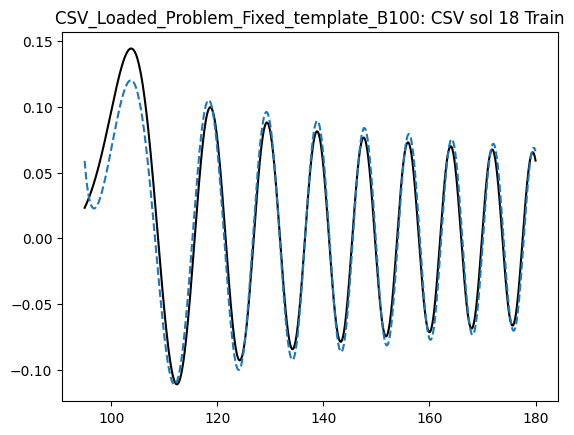

In [37]:
lwr_limit, hgh_limit = (95, 180)
X_test = np.linspace(lwr_limit,hgh_limit, 1000).reshape(-1,1)
y_test = special.jv(100, X_test).reshape(-1, 1)

my_problem_csv.solutions[k].plot_results(X_test, y_test)

In [ ]:
my_problem_csv.solutions[k].display_expression(), str(my_problem_csv.solutions[k].sympy_expr)

In [ ]:
order = 100
phase = -np.pi/2 * 100 - np.pi/4
ampl = np.sqrt(2/np.pi)

In [81]:
Candidate = Promising_solution(sympy_expr=sp.parse_expr(f'sqrt(2/pi)*cos(X1 + b1 + b2/(-sqrt(X1)/(X1 - b3 - b4/(X1*b5 - b6)) + X1 - b7))/(sqrt(X1-b8))'), test_data = (X.flatten(), y.flatten()), solution = my_problem_csv.solutions[k], initial_parameters=my_problem_csv.solutions[k].b_vals)

In [82]:
Candidate.optimisation()

`xtol` termination condition is satisfied.
Number of iterations: 1514, function evaluations: 13626, CG iterations: 3590, optimality: 6.75e-03, constraint violation: 0.00e+00, execution time:  2.3 s.

Optimization summary:
Parameter | Old Value | New Value | Abs Difference
--------- | --------- | --------- | --------------
b1        | 1.1711    | 1.85533   | 0.684229      
b2        | 3922.57   | 3924.23   | 1.65948       
b3        | 1.28411   | 1.31849   | 0.0343777     
b4        | 3923.74   | 3923.74   | 0.00209928    
b5        | 0.764688  | 0.135615  | 0.629073      
b6        | 27.7915   | 27.6779   | 0.113598      
b7        | 26.9558   | 27.6586   | 0.702772      
b8        | 2.10817   | 44.4652   | 42.357        



(sqrt(2)*cos(X1 + 1.85533067693191 + 3924.23198061582/(-sqrt(X1)/(X1 - 1.31849251751226 - 3923.73514190914/(0.135615056612623*X1 - 27.6778756594077)) + X1 - 27.658590996827))/(sqrt(pi)*sqrt(X1 - 44.4651811535025)),
 {'b1': np.float64(1.8553306769319147),
  'b2': np.float64(3924.2319806158225),
  'b3': np.float64(1.3184925175122577),
  'b4': np.float64(3923.7351419091433),
  'b5': np.float64(0.1356150566126229),
  'b6': np.float64(27.67787565940768),
  'b7': np.float64(27.658590996826955),
  'b8': np.float64(44.46518115350251)},
 {'b1': np.float64(0.6842293892122211),
  'b2': np.float64(1.6594779980982821),
  'b3': np.float64(0.03437774434076224),
  'b4': np.float64(0.0020992826462133962),
  'b5': np.float64(0.6290727018307922),
  'b6': np.float64(0.11359780505420858),
  'b7': np.float64(0.7027722403907539),
  'b8': np.float64(42.357014756079266)},
 np.float64(3.154113844817433))

(-0.2, 0.2)

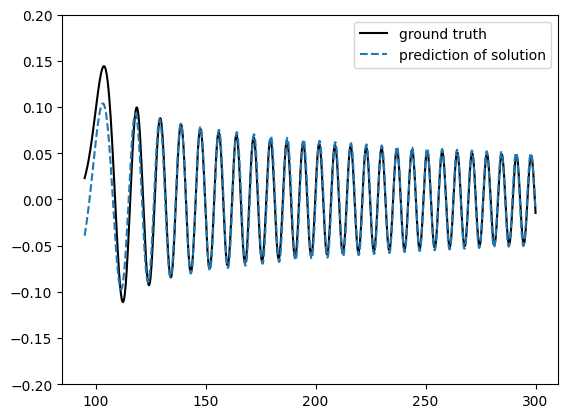

In [84]:
lwr_limit, hgh_limit = (95, 300)
X_test = np.linspace(lwr_limit,hgh_limit, 1000).reshape(-1,1)
y_test = special.jv(100, X_test).reshape(-1, 1)
Candidate.plot_comparison(X_test, y_test)
#New_sol_round.plot_comparison(X_test, y_test)
plt.ylim(-0.2, 0.2)

In [86]:
Candidate.modified_parameters

{'b1': np.float64(1.8553306769319147),
 'b2': np.float64(3924.2319806158225),
 'b3': np.float64(1.3184925175122577),
 'b4': np.float64(3923.7351419091433),
 'b5': np.float64(0.1356150566126229),
 'b6': np.float64(27.67787565940768),
 'b7': np.float64(27.658590996826955),
 'b8': np.float64(44.46518115350251)}